sage -n jupyter

# 1 Premiers contacts

## 1.1

L'opération (M,v) :-> Mv est de complexité n² (n multiplications par lignes), et (M,N) :-> MN est de complexité n³ (on fait l'opération précédente sur les n colonnes de N).

In [3]:
def mult_vec_dense(M,v):
    return vector([sum(M[i,j]*v[j] for j in range(v.length())) for i in range(M.nrows())])

In [4]:
myM = random_matrix(ZZ,4,3); myv = vector(random_matrix(ZZ,1,3));myM,myv

(
[  0 526  -1]            
[-89   2 -40]            
[  1  -2  -1]            
[  2  -8   0], (1, -1, 2)
)

In [5]:
myM*myv, mult_vec_dense(myM,myv)

((-528, -171, 1, 10), (-528, -171, 1, 10))

In [6]:
def mult_mat_dense(M,N):
    return matrix([mult_vec_dense(M,c) for c in N.columns()]).transpose()

In [7]:
myN = random_matrix(ZZ,3,5); myN

[ 0 -1  0 -3  7]
[-1  1 -1 -1  5]
[ 2  2 -1  1  1]

In [8]:
myM*myN, mult_mat_dense(myM,myN)

(
[-528  524 -525 -527 2629]  [-528  524 -525 -527 2629]
[ -82   11   38  225 -653]  [ -82   11   38  225 -653]
[   0   -5    3   -2   -4]  [   0   -5    3   -2   -4]
[   8  -10    8    2  -26], [   8  -10    8    2  -26]
)

## 1.2

La densité dans Sage est par rapport au nombre de coefficients dans chaque ligne et chaque colonne.

In [9]:
matrix.random(ZZ,10,10,density=.2)

[  0   0   0   0   1   0   0   0   0   0]
[  0  -1   0   0   0   0   0  -2   0   0]
[  0   0   0   0   0  -1   0   0   3   0]
[-10   0   0   0   0   0   0   0  -5   0]
[  1  -2   0   0   0   0   0   0   0   0]
[  0   1   0   0  12   0   0   0   0   0]
[  0   0   2   0   0   0   0   0   0  -1]
[  0   0   0  -1   0   0 -22   0   0   0]
[  0   0   0   0   0   0   0  -1   0  -1]
[  0   0   0   0   0   2  -1   0   0   0]

In [10]:
matrix.random(GF(9),10,10,density=.1)

[       0        0        0        0        0        0        0        0        0     2*z2]
[       0        0        0        0        0        0        0        0        0        0]
[       0        0   z2 + 1        0        0        0        0        0        0        0]
[       0        0        0        0        0        0        0        0        0        0]
[       0        0        0        0        0        0        2        0        0        0]
[       0        0        0        0        0        0        0        0        0        0]
[       0        0        0        0        0        0   z2 + 2        0        0        0]
[       0        0   z2 + 2        0        0        0        0        0        0        0]
[      z2        0 2*z2 + 1        0        0        0        0       z2        0        0]
[       0        0        0 2*z2 + 1        0        0        2        0        0        0]

## 1.3

v :-> Mv est de complexité φ(n)n (φ(n) sur chaque ligne) et N :-> MN est donc de complexité φ(n)n² (on répète l'opération précédente pour chaque colonne de N)

## 1.4

In [11]:
def gen_generic(A,n,lignes,colonnes,coeffs):
    return [A, n, vector(ZZ,lignes), vector(ZZ,colonnes), vector(A, coeffs)]

In [12]:
gen_generic(ZZ,6,[0,1],[1,4],[-2,1/2])

TypeError: unable to convert 1/2 to an element of Integer Ring

In [13]:
gen_generic(ZZ,6,[0,1],[1,4],[-2,3])

[Integer Ring, 6, (0, 1), (1, 4), (-2, 3)]

On définit maintenant les accesseurs (utiles car on n'a pas à tout remodifier ensuite si l'on modifie l'implantation)

In [14]:
def get_ring(M):
    return M[0]

In [15]:
def get_size(M):
    return M[1]

In [16]:
def get_rows(M):
    return M[2]

In [17]:
def get_ncoefs(M):
    return matc_get_rows(M).length()

In [18]:
def get_cols(M):
    return M[3]

In [19]:
def get_coefs(M):
    return M[4]

On passe maintenant aux fonctions usuelles

In [20]:
def to_dense(M): #version pleine d'une matrice creuse (utile pour l'impression)
    N = matrix(get_ring(M),get_size(M))
    myr = get_rows(M)
    myc = get_cols(M)
    mycoefs = get_coefs(M)
    for i in range(len(myr)):
        N[myr[i],myc[i]] = mycoefs[i]
    return N

In [21]:
def gen_zero(A,n):
    return gen_generic(A,n,[],[],[])

In [22]:
gen_zero(ZZ,3)

[Integer Ring, 3, (), (), ()]

In [23]:
to_dense(gen_zero(ZZ,3))

[0 0 0]
[0 0 0]
[0 0 0]

In [24]:
def gen_id(A,n):
    return gen_generic(A,n,range(n),range(n),[1 for i in range(n)])

In [25]:
gen_id(ZZ,5)

[Integer Ring, 5, (0, 1, 2, 3, 4), (0, 1, 2, 3, 4), (1, 1, 1, 1, 1)]

In [26]:
to_dense(gen_id(ZZ,6))

[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 0 1 0 0 0]
[0 0 0 1 0 0]
[0 0 0 0 1 0]
[0 0 0 0 0 1]

In [27]:
gen_id(Integers(4),6)

[Ring of integers modulo 4,
 6,
 (0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 5),
 (1, 1, 1, 1, 1, 1)]

In [28]:
to_dense(gen_id(Integers(4),6))

[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 0 1 0 0 0]
[0 0 0 1 0 0]
[0 0 0 0 1 0]
[0 0 0 0 0 1]

In [29]:
def mult_vec(M,v):
    # on suppose que les anneaux de définition sont compatibles
    # le résultat n'est pas creux
    myr = get_rows(M)
    myc = get_cols(M)
    mycoefs = get_coefs(M)
    res = [0 for i in range(v.length())]
    for i in range(myr.length()):
        res[myr[i]] += mycoefs[i] * v[myc[i]]
    return vector(res)

In [30]:
mult_vec(gen_id(ZZ,5),vector(QQ,[1,4/3,6,9,1]))

(1, 4/3, 6, 9, 1)

In [31]:
def mult_mat(M,N):
    # M est creuse, pas N
    return matrix([mult_vec(M,c) for c in N.columns()]).transpose()

In [32]:
def gen_random(A, n, phi):
    # génère une matrix aléatoire de taille n avec phi(n) = n*phi
    mesrows = []
    mescols = []
    mescoefs = []
    for i in range(n):
        temp = {randint(0,n-1) for j in [1..floor(n*phi)]}
        for j in temp:
            mesrows.append(i)
            mescols.append(j)
            mescoefs.append(A.random_element())
    return gen_generic(A,n,mesrows,mescols,mescoefs)            

In [33]:
myM = gen_random(ZZ,10,.2); to_dense(myM)

[  0   0   0   0   0  -1   0   0  -3   0]
[  0   0   0   0  -4   0   0   0   1   0]
[  0   0   1   0   0   0   0   0   0   0]
[  0   0   1   0   0   7   0   0   0   0]
[  0   0   0   0   0 105   0   0   0   0]
[  0   4  12   0   0   0   0   0   0   0]
[  0   0   0  -1   0   0   0   0   0  -1]
[  0   0   0   0   0   0  -3  -1   0   0]
[  2   0   0   0   0   0   0   0   0   0]
[  0   4   0   1   0   0   0   0   0   0]

In [34]:
myN = random_matrix(ZZ,10); myN

[ -2   0   1   1   1   6   1   6  -1   1]
[ -2   1  -1   2   0   0  -1   1   2  -1]
[  2   1  12   0  -1  -1   3  49   0   3]
[ -1 347  -3   0  -1   9   0 -17   4   1]
[  0  -6   0   1   0   2  -4   0   4  -2]
[ -1   2   1  -1   3  -1   1   3   0   2]
[  1   2   2   0   1  -1   0  -1  -1   0]
[  2  -1   1   1   1   1   0 -70  10  -1]
[  1   0  -1  -1   0   6  -1   1  -2  -1]
[  0   1  -2  -3  13  -2  -1   2   1   1]

In [35]:
mult_mat(myM,myN)

[  -2   -2    2    4   -3  -17    2   -6    6    1]
[   1   24   -1   -5    0   -2   15    1  -18    7]
[   2    1   12    0   -1   -1    3   49    0    3]
[  -5   15   19   -7   20   -8   10   70    0   17]
[-105  210  105 -105  315 -105  105  315    0  210]
[  16   16  140    8  -12  -12   32  592    8   32]
[   1 -348    5    3  -12   -7    1   15   -5   -2]
[  -5   -5   -7   -1   -4    2    0   73   -7    1]
[  -4    0    2    2    2   12    2   12   -2    2]
[  -9  351   -7    8   -1    9   -4  -13   12   -3]

In [36]:
to_dense(myM) * myN

[  -2   -2    2    4   -3  -17    2   -6    6    1]
[   1   24   -1   -5    0   -2   15    1  -18    7]
[   2    1   12    0   -1   -1    3   49    0    3]
[  -5   15   19   -7   20   -8   10   70    0   17]
[-105  210  105 -105  315 -105  105  315    0  210]
[  16   16  140    8  -12  -12   32  592    8   32]
[   1 -348    5    3  -12   -7    1   15   -5   -2]
[  -5   -5   -7   -1   -4    2    0   73   -7    1]
[  -4    0    2    2    2   12    2   12   -2    2]
[  -9  351   -7    8   -1    9   -4  -13   12   -3]

## 1.5

In [37]:
M = gen_random(ZZ,200,.01); M

[Integer Ring,
 200,
 (0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 11

In [38]:
Mdense = to_dense(M); N = random_matrix(ZZ,200)

In [39]:
time(mult_mat(M,N))

CPU times: user 391 ms, sys: 31 ms, total: 422 ms
Wall time: 454 ms


200 x 200 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [40]:
time(mult_mat_dense(Mdense,N))

CPU times: user 7 s, sys: 31 ms, total: 7.03 s
Wall time: 7.2 s


200 x 200 dense matrix over Integer Ring (use the '.str()' method to see the entries)

## 1.6

Il faut faire via la méthode naïve, pour garder le caractère creux

In [41]:
def puiss(M,n): # M creuse
    if n == 0:
        return identity_matrix(get_size(M))
    return mult_mat(M,puiss(M,n-1))

In [42]:
def expo_rap(M,n): #M pleine
    if n == 0:
        return identity_matrix(M.nrows())
    N = expo_rap(M,n//2)
    res = mult_mat_dense(N,N)
    if n%2 == 0:
        return res
    return mult_mat_dense(res,M)

In [43]:
M = gen_random(ZZ,200,.01); M

[Integer Ring,
 200,
 (0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 1

In [44]:
Mdense = to_dense(M); Mdense

200 x 200 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [45]:
time(puiss(M,4))

CPU times: user 922 ms, sys: 15 ms, total: 937 ms
Wall time: 983 ms


200 x 200 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [46]:
time(expo_rap(Mdense,4))

CPU times: user 50.5 s, sys: 750 ms, total: 51.3 s
Wall time: 1min 24s


200 x 200 dense matrix over Integer Ring (use the '.str()' method to see the entries)

# 2 Intermède polynômes

In [47]:
K = QQ

In [48]:
KX.<X> = PolynomialRing(K)

## 2.1

In [49]:
def division(A, B): # A, B sont dans KX ; renvoie [quotient, reste]
    assert(B != KX.zero())
    if B.degree() > A.degree(): # le degré du polynôme nul est -1
        return [KX.zero(), A]
    Qloc = A.leading_coefficient() / B.leading_coefficient() * X^(A.degree() - B.degree())
    respart = division(A -  Qloc * B, B)
    return [Qloc + respart[0], respart[1]]

In [50]:
division(X^2+1,X)

[X, 1]

In [51]:
division(X^2+1,0)

AssertionError: 

In [52]:
(X^4+1).quo_rem(X^2+X+2), division(X^4+1,X^2+X+2)

((X^2 - X - 1, 3*X + 3), [X^2 - X - 1, 3*X + 3])

## 2.2

In [53]:
def euclide(A, B): # A, B dans KX non tous nuls ; renvoie le pgcd unitaire de A et B via l'algorithme d'Euclide
    R0 = A
    R1 = B
    while R1 != KX.zero():
        R = R0
        R0 = R1
        R1 = division(R, R1)[1]
    return R0 / R0.leading_coefficient()

In [54]:
euclide(X^4-1,X^3+X)

X^2 + 1

In [55]:
gcd(X^4-1,X^3+X)

X^2 + 1

## 2.3

In [56]:
def euclide_etendu(A, B):
    R0 = A
    R1 = B
    U0 = KX.one()
    U1 = KX.zero()
    V0 = KX.zero()
    V1 = KX.one()
    # U0 A + V0 B = R0
    # U1 A + V1 B = R1
    while R1.degree() >= 0:
        d = division(R0, R1)
        R0 = R1
        R1 = d[1]
        U = U0
        V = V0
        U0 = U1
        V0 = V1
        U1 = U - U0 * d[0]
        V1 = V - V0 * d[0]
    # R1 est nul et R0 est constant
    return U0/R0.leading_coefficient(),V0/R0.leading_coefficient()

In [57]:
myA = KX.random_element(degree=6); myA

-1/9*X^6 + 2/3*X^5 - X^2 - X - 1/2

In [58]:
myB = KX.random_element(degree=6); myB

-X^6 + 3*X^5 + 1/10*X^4 + 1/4*X^3 - X^2 + 11/10

In [59]:
euclide(myA,myB),gcd(myA,myB)

(1, 1)

In [60]:
myU,myV = euclide_etendu(myA,myB); myU,myV

(-1385248570671600/4233265297132627*X^5 + 3768011217238320/4233265297132627*X^4 + 452284816359600/604752185304661*X^3 - 7279314790927932/4233265297132627*X^2 + 5920964334207900/4233265297132627*X - 3100216569431382/4233265297132627,
 153916507852400/4233265297132627*X^5 - 880417436583680/4233265297132627*X^4 - 465630260197720/4233265297132627*X^3 + 1473021833603920/4233265297132627*X^2 - 127031274843120/4233265297132627*X + 2439233647651760/4233265297132627)

In [61]:
myA*myU + myB*myV

1

# 3 Suites récurrentes linéaires

## 3.2

In [62]:
def euclide_etendu_restr(A, m):
    # on fait l'algo d'Euclide à A et X^2m, mais on s'arrête dès que le reste est de degré < m
    # on aura à priori A = le U de l'énoncé et m = e
    R0 = A
    R1 = X^(2*m)
    U0 = KX.one()
    U1 = KX.zero()
    V0 = KX.zero()
    V1 = KX.one()
    # U0 A + V0 B = R0
    # U1 A + V1 B = R1
    while R1.degree() >= m:
        d = division(R0, R1)
        R0 = R1
        R1 = d[1]
        U = U0
        V = V0
        U0 = U1
        V0 = V1
        U1 = U - U0 * d[0]
        V1 = V - V0 * d[0]
    # le degré de R1 est < m
    return U1 # c'est le P de l'énoncé

## 3.3

In [63]:
def trouve_pol_ann_suite(u):
    M = len(u)
    e = M // 2 # on veut 2e-1 ≤ M-1
    return euclide_etendu_restr(sum(u[2*e - 1 - i] * X^i for i in range(0, 2*e)), e)

On teste pour la suite de Fibonacci : on a d = 2 donc on doit produire au moins 2e = 4 termes.

In [64]:
trouve_pol_ann_suite([0,1,1,2])#,3,5,8])

-X^2 + X + 1

On teste pour la suite de Padovan : on a d = 3 donc on doit produire au moins 2e = 6 termes.

In [65]:
trouve_pol_ann_suite([1,1,1,2,2,3])

-X^3 + X + 1

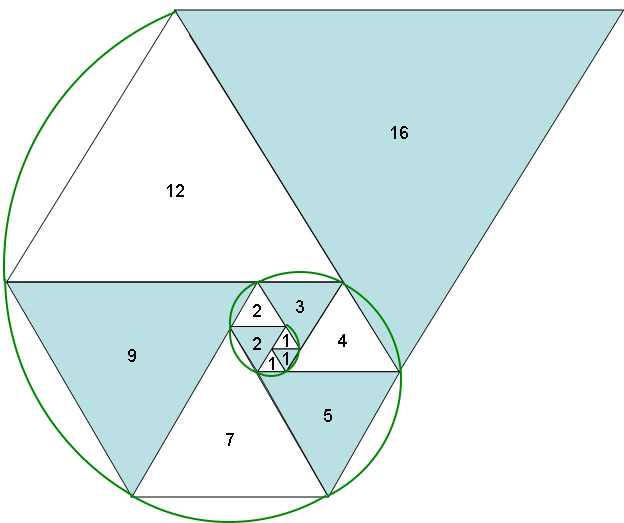

# 4 Inverse d'une matrice creuse

## 4.2.(a)

Si P(M) = 0 alors l'ensemble des y tels que P(M)y = 0 est un hyperplan, de mesure nulle (car on est sur R ou C). Si pour un y c'est ≠ 0, l'ensemble des x tel que x (P(M)y) = 0 est également un hyperplan donc c'est pareil.

In [66]:
def pol_ann_en_inv(P, M):
    #P annulateur de M, renvoie M^-1
    #M est une matrice creuse
    puiss = P.exponents()
    assert puiss[0] == 0 #le polynôme doit posséder un terme constant non nul
    coeff = P.coefficients() #mode creux, comme puiss
    # on doit renvoyer -sum(expo(M, puiss[i] - 1) * coeff[i] for i in range(1,len(coeff))) / coeff[0], mais de façon intelligeante
    puissM = identity_matrix(get_size(M))
    res = matrix.zero(get_size(M))
    puiss[0] = 1
    for i in range(1, len(puiss)):
        for j in range(puiss[i-1], puiss[i]):
            puissM = mult_mat(M, puissM)
        # puissM est maintenant M^(puiss[i] - 1)
        res = puissM * coeff[i] + res
    return res * (-1 / coeff[0])

In [67]:
M = gen_random(QQ,10,.6); Mdense=to_dense(M); Mdense,det(Mdense)

(
[   0    1    0    0 1/15    1    0    0    2    0]             
[ 1/2    0  1/4    0   -2    0    0    0    0    0]             
[   0    0 -7/3    0    1    0    0    2    0  -13]             
[  -1    0 39/2   -1    0    0    0   -2    1    0]             
[ 1/3    0  -11    0   10    0    0    2    0   -1]             
[   0    0    0  1/5    0   -2  4/5    0 11/5    0]             
[ 1/4    0    0    1    0    0    0    0  7/4    0]             
[   0    0    0    0    0    3    0 -1/3    0  1/5]             
[   0    1    0    0    0   -1    0    0   -1    0]             
[  -2    0    0    0    0    0    0    0    0    3], 4099679/450
)

In [68]:
pol_ann_en_inv(Mdense.characteristic_polynomial(),M)

[  -268785/4099679   3137244/4099679   -340173/4099679    293220/4099679    663258/4099679                 0    293220/4099679    179190/4099679    268785/4099679  -1264943/4099679]
[  2631527/8199358  8747384/61495185   323533/40996790     55414/4099679  1046247/40996790                 0     55414/4099679    489384/4099679   5567831/8199358  2136704/61495185]
[  -377190/4099679   1956324/4099679     66234/4099679    411480/4099679    387156/4099679                 0    411480/4099679    251460/4099679    377190/4099679    399302/4099679]
[ -2515410/4099679   1137630/4099679    189324/4099679    135197/4099679    225363/4099679                 0   4234876/4099679   1676940/4099679   2515410/4099679    783729/4099679]
[  -114345/4099679  -1020988/4099679    -76764/4099679    124740/4099679    214209/4099679                 0    124740/4099679     76230/4099679    114345/4099679   -266323/4099679]
[  -320023/8199358 25221164/61495185   919423/40996790    174558/4099679  3281547/40996790

In [69]:
mult_mat(M,_)

[1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1]

## 4.2.(b)

In [70]:
def trouve_pol_ann(M):
    # M est creuse
    # on veut trouver un polynôme annulateur de degré n (la taille de M)
    # ... donc e = n
    e = get_size(M)
    x = vector(QQ.random_element() for i in range(e))
    y = vector(QQ.random_element() for i in range(e))
    My = y
    U = [0 for i in range(2*e)]
    for i in range(2*e):
        U[i] = x * My
        My = mult_vec(M,My)
    return trouve_pol_ann_suite(U)
    # on a bien deg R < e (sinon U serait tout le temps nul)    

In [71]:
def inverse(M):
    return pol_ann_en_inv(trouve_pol_ann(M), M)

In [72]:
myM = gen_random(ZZ,10,.5); to_dense(myM),det(to_dense(myM))

(
[  1  49  -2   0   0   0   0   1   0   0]          
[ 21   0   0   0   4   0   0   1   0   3]          
[  0   0   0   3   0  -2   0   0  -1   0]          
[  0   1   1 -27   4   0   0   0  -1   0]          
[  0   0  -1   1   1   0  -9   0   0   0]          
[  0   0   0   0   2   0   2   0   0  -1]          
[  0   0  -2   0   0   0   0   0   0   0]          
[  0   0   0   4   0   0   0  -1   0   0]          
[  0  -1   0   0   0   0  -1   0   0   4]          
[  1   0   1   0   0   0  -1   2   0   0], -2509584
)

In [73]:
inverse(myM)

[    -127/104566       695/14259               0               0    -1774/156849     -4801/52283    -2701/627396      887/313698       -127/2134    -2337/104566]
[      305/14938         -1/2037               0               0        26/22407          3/7469     -2335/89628       -13/44814          1/2134      -151/14938]
[              0               0               0               0               0               0            -1/2               0               0               0]
[      39/209132       -88/14259               0               0    -1786/156849       943/52283   88105/1254792   158635/627396         39/4268    27065/209132]
[       69/29876          1/2037               0               0      2011/22407       3392/7469    -9589/179256     -2011/89628        483/4268      -377/29876]
[     -629/52283       -887/9506            -1/2             1/2    -18345/52283   -66707/104566     74411/52283   401295/104566       -191/2134   206155/104566]
[      29/104566         -3/

In [74]:
mult_mat(myM,_)

[1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1]

L'algorithme qui utilise le pivot de Gauss est de complexité O(n³) (également pour une matrice creuse). Ici pour générer la suite u on calcule successivement My, M(My), M(M²y),...,M(M^{k-1}y) puis on multiplie ces vecteurs par x. Le calcul M x vecteur a un cout φ(n)n, on fait ça 2e-1 fois où e est la taille de m donc on obtient φ(n)n².
La multiplication par x est est O(n²) donc ça ne change pas.
On doit ensuite trouver un polynôme annulateur à partir de u, là c'est Euclide étendu pour des polynômes de degré 2e (donc de l'ordre de n) donc O(n²).
Pour ensuite évaluer le polynôme annulateur (modifié) en la matrice, on calcule les puissances de la matrice creuse M (donc φ(n)n²) jusqu'à la puissance à peu près n, donc φ(n)n³, qui donc l'emporte. En fait du coup la complexité est plus grande que le pivot de Gauss, mais si on dit qu'on s'intéresse seulement aux systèmes linéaires (et un seul suffit à inverser M, cf. Mx=y !) alors on a bien φ(n)n² qui est plus petit que les n³ du pivot de Gauss.